# Contributor evaluation

In [1]:
%matplotlib inline

In [2]:
from github2pandas.github2pandas import GitHub2Pandas
from github2pandas.version import Version
from pathlib import Path
import pandas as pd
import logging
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

In [3]:
git_repo_name = "AirSim"
git_repo_owner = "microsoft"
       
data_root_dir = Path("data")

log_level = logging.DEBUG

github_token = os.environ['GITHUB_API_TOKEN']

In [4]:
repo_data_dir = Path(data_root_dir, git_repo_owner, git_repo_name)
versions_path = Path.joinpath(repo_data_dir, Version.Files.DATA_DIR)
df_edits = GitHub2Pandas.get_pandas_data_frame(versions_path, Version.Files.EDITS)
df_commits = GitHub2Pandas.get_pandas_data_frame(versions_path, Version.Files.COMMITS)

In [5]:
print(f"{len(df_commits.author.unique())} contributors at all")

183 contributors at all


In [6]:
df_contributors = df_commits.resample('W', on='commited_at').agg({'author':lambda x: set(x)})
df_contributors.reset_index(inplace = True)

print(f"{df_contributors.shape[0]} weeks in project")

264 weeks in project


## Data preparation

In [7]:
z = []
for k,row in df_contributors.iterrows():
    for j in list(np.array(list(row.author)).flat):
        z.append({'date':row.commited_at, 'id':j})
df_contributors_per_week = pd.DataFrame(z)

In [8]:
df_contributors_per_week.head()

,date,id
0,2017-02-19,None
1,2017-02-19,learn-main-short-place
2,2017-02-19,follow-want-hard-people
3,2017-02-19,win-certain-common-book
4,2017-02-19,could-human-religious-thing


Oha, their are some not known contributors involved. 

In [9]:
df_contributors_per_week.drop(df_contributors_per_week[df_contributors_per_week['id'].isnull()].index, inplace = True)

## Analysis

### Question 1: What is the usual count of different contributors per week?

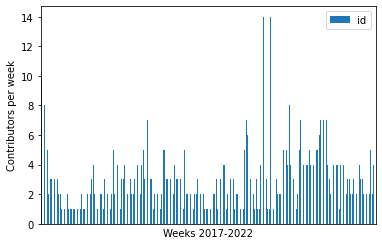

In [10]:
timeline = df_contributors_per_week.groupby(['date']).count()

fig,ax = plt.subplots()

timeline.plot.bar(ax=ax)
plt.xticks([])
plt.xlabel("Weeks 2017-2022")
plt.ylabel("Contributors per week");

### Question 2: What is the usual number of contributions by an individual contributor?

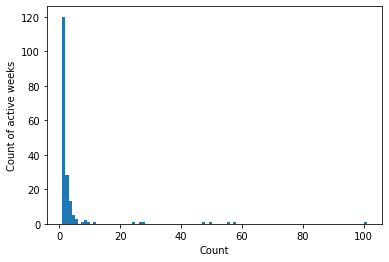

In [11]:
hist = df_contributors_per_week.groupby(['id']).count().sort_values("date", ascending=False).values
hist = [item for sublist in hist for item in sublist]

fig, ax = plt.subplots()
plt.hist(hist, 100);
plt.xlabel("Count")
plt.ylabel("Count of active weeks");